In [87]:
# import Necessary datasets 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spam-new-cleaned/train1.csv
/kaggle/input/spam-cleraned/train1.csv


In [88]:
# load datasets 
train=pd.read_csv("/kaggle/input/spam-new-cleaned/train1.csv")
#test=pd.read_csv("/kaggle/input/new-spam/test.csv")

In [89]:
# check and remove duplicates values in datasets 
train.duplicated().sum()
train.drop_duplicates(inplace=True)


# test.duplicated().sum()
# test.drop_duplicates(inplace=True)

In [90]:
# check datasets 
train.duplicated().sum()
# test.duplicated().sum()

0

In [92]:
# see datasets 
train.head()

,text,label,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,hey I am looking for Xray baggage datasets can...,not_spam,NaN,NaN,NaN
1,"""Get rich quick! Make millions in just days wi...",spam,NaN,NaN,NaN
2,URGENT MESSAGE: YOU WON'T BELIEVE WHAT WE HAVE...,spam,NaN,NaN,NaN
3,[Google AI Blog: Contributing Data to Deepfake...,not_spam,NaN,NaN,NaN
4,Trying to see if anyone already has timestamps...,not_spam,NaN,NaN,NaN


In [93]:
# not a spam or not_spam see data
train[~train["label"].isin(["spam", "not_spam"])]

,text,label,Unnamed: 2,Unnamed: 3,Unnamed: 4
6183,I've made a zip code-level data retriever in R...,NaN,NaN,NaN,NaN
6184,NaN,NaN,NaN,NaN,NaN
6188,"gsub(""""\[ :\]""""","\_""""",Sys.time())),".csv"""")","jsonlite::fromJSON(""""[https://services6.arcgis..."
6192,"gsub(""""\[ :\]""""","\_""""",Sys.time())),".csv"""")","jsonlite::fromJSON(""""[https://services.arcgis...."
6196,"gsub(""""\[ :\]""""","\_""""",Sys.time())),".csv"""")","jsonlite::fromJSON(""""[https://services.arcgis...."
6200,"gsub(""""\[ :\]""""","\_""""",Sys.time())),".csv"""")","jsonlite::fromJSON(""""[https://services.arcgis...."
6202,not_spam,0,NaN,NaN,NaN


In [94]:
# drop except notspam and spam raw's categories 
train.drop(train[~train["label"].isin(["spam", "not_spam"])].index, inplace=True)

In [95]:
# how much values spam or not in datasets 
train.label.value_counts(normalize=True)*100

label
spam        51.589907
not_spam    48.410093
Name: proportion, dtype: float64

In [96]:
# encode target columns
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

train['trans_target'] = encoder.fit_transform(train['label'])

In [140]:
# check encode values 
encoder.classes_
encoder.transform(['not_spam', 'spam'])

array([0, 1])

In [97]:
# check columns names 
train.columns

Index(['text', 'label', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'trans_target'],
      dtype='object')

In [178]:
# # drop unnecessary columns
# train.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True, axis=1)

In [99]:
train.head()

,text,label,trans_target
0,hey I am looking for Xray baggage datasets can...,not_spam,0
1,"""Get rich quick! Make millions in just days wi...",spam,1
2,URGENT MESSAGE: YOU WON'T BELIEVE WHAT WE HAVE...,spam,1
3,[Google AI Blog: Contributing Data to Deepfake...,not_spam,0
4,Trying to see if anyone already has timestamps...,not_spam,0


In [100]:
# #!pip install nltk
# import nltk
# nltk.download('punkt',quiet=True)

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

In [179]:
# import necessary libraries
#nltk.download('all')

from nltk.tokenize import word_tokenize, sent_tokenize
import string
string.punctuation

from nltk.corpus import stopwords
english_stopwords = stopwords.words('english')

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [103]:
# Text preprocessing
#-----------------------------------------------------------------------------------------------------------
def transform(text):                          
    text = text.lower()                     #Lower_case
    text = nltk.word_tokenize(text)         #word_tokenization
    
    y=[]
    for i in text:
        if i.isalnum():                     #removing non alpha-numeric characters
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:                          #removing stopwords and punctuations
        if i not in english_stopwords and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))                #stemming
            
    return " ".join(y)

In [104]:
# call the function 
train['transformed_text'] = train['text'].apply(transform)
train['transformed_text']

0                      hey look xray baggag dataset provid
1        get rich quick make million day new revolution...
2        urgent messag wo believ offer hey yeah eye rea...
3        googl ai blog contribut data deepfak detect re...
4        tri see anyon alreadi timestamp key event happ...
                               ...                        
10754    hi look dataset traffic volum per cell dataset...
10755                                 good usabl http http
10756    sure absolut best sub put search show noth obv...
10758                          field hashrat vram tdp msrp
10759    feelin like get enough attent social media wel...
Name: transformed_text, Length: 10661, dtype: object

In [105]:
train.head()

,text,label,trans_target,transformed_text
0,hey I am looking for Xray baggage datasets can...,not_spam,0,hey look xray baggag dataset provid
1,"""Get rich quick! Make millions in just days wi...",spam,1,get rich quick make million day new revolution...
2,URGENT MESSAGE: YOU WON'T BELIEVE WHAT WE HAVE...,spam,1,urgent messag wo believ offer hey yeah eye rea...
3,[Google AI Blog: Contributing Data to Deepfake...,not_spam,0,googl ai blog contribut data deepfak detect re...
4,Trying to see if anyone already has timestamps...,not_spam,0,tri see anyon alreadi timestamp key event happ...


In [106]:
# import necessary libraries and convert text into Term frequency 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(train['transformed_text']).toarray()

In [180]:
# target value put in y variable
y=train["trans_target"]

In [150]:
# split dataset train & testing sets 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.50 , random_state=42)

In [151]:
# import nesseracy lib. and create model instance 
from sklearn.naive_bayes import MultinomialNB                  #performs best with best precision
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
mnb = MultinomialNB()

In [169]:
#Here MultinomialNB is best, as data is imbalanced, so precision matters alot.

mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)



# Print accuracy score
print("Accuracy Score:", accuracy_score(y_test, y_pred2))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))

# Print precision score
print("Precision Score:", precision_score(y_test, y_pred2))

Accuracy Score: 0.99699868692553
Confusion Matrix:
 [[2620   11]
 [   5 2695]]
Precision Score: 0.9959349593495935


In [153]:
# create decison matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm=confusion_matrix(y_test, y_pred2)

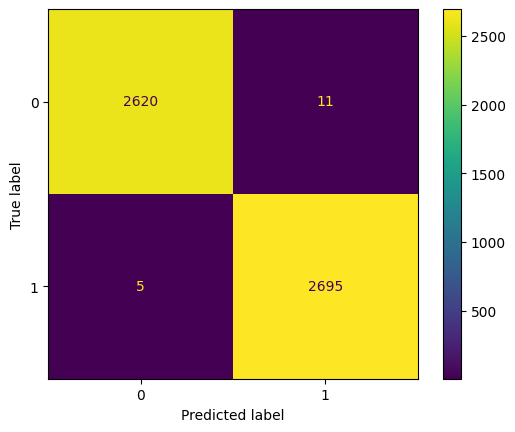

In [154]:
# plot ConfusionMatrixDisplays

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [155]:
# check binary losss 
from sklearn.metrics import log_loss

loss = log_loss(y_test, y_test)

print("Binary Cross-Entropy Loss (Log Loss):", loss)

Binary Cross-Entropy Loss (Log Loss): 2.2204460492503136e-16


In [172]:
# split data into K-Fold or cross validation 
from sklearn.model_selection import cross_val_score

scores = cross_val_score(mnb, X_train, y_train, cv=5)
print("Cross-Validation Accuracy:", scores)
print("Mean Accuracy:", scores.mean())


Cross-Validation Accuracy: [1.         0.99624765 0.99812383 0.99718574 0.99530957]
Mean Accuracy: 0.9973733583489681


<h1 style="text-align : center;">Check Prediction</h1>

In [176]:
# Make sure you haven't overwritten built-in names like 'str' or 'input'
user_input = ["If you find high training accuracy but low test accuracy, try: Simplifying the model (e.g., fewer layers, smaller depth) Using regularization (like L1, L2) Adding more data Using dropoutin neural networks"]

termfreq = tfidf.transform(user_input).toarray()

prediction = mnb.predict(termfreq)

if prediction==[0]:
    print("Ham")
else:
    print("spam")

Ham


In [181]:
# model dump in pickle or joblib
import joblib

joblib.dump(tfidf,"vectorizer.pkl")
joblib.dump(mnb,"model.pkl")


['model.pkl']

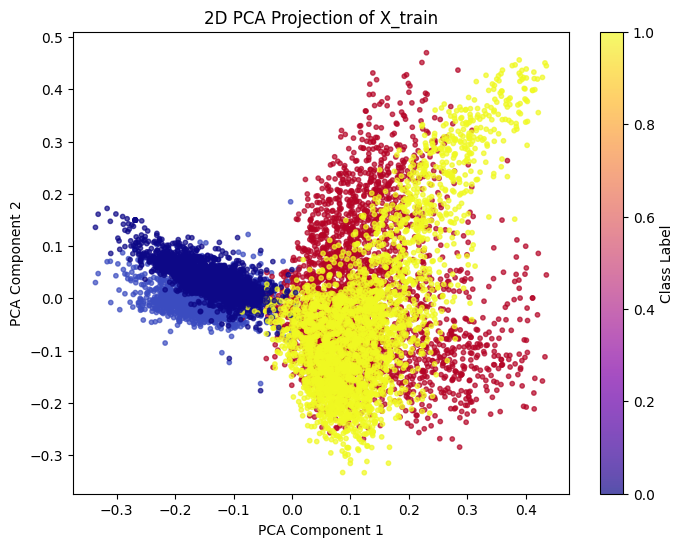

In [168]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2 components for 2D plot
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_train)  # Use .toarray() if X_train is sparse

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 2], c=y_train, cmap='coolwarm', s=10, alpha=0.7)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='plasma', s=10, alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D PCA Projection of X_train')
plt.colorbar(label='Class Label')
plt.show()


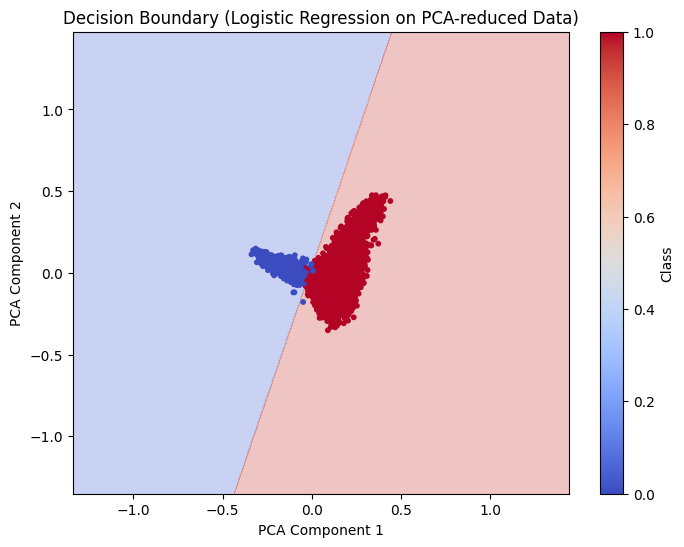

In [118]:
from sklearn.decomposition import PCA

# Reduce high-dimensional X_train to 2D
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)  # Use .toarray() if X_train is sparse


from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train_2d, y_train)


import numpy as np
import matplotlib.pyplot as plt

# Create mesh grid
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict over the grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot contour
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap='coolwarm', s=10)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Decision Boundary (Logistic Regression on PCA-reduced Data)')
plt.colorbar(label='Class')
plt.show()
